# Telecomunicaciones - Identificar Operadores Ineficaces


## **Descripción General**

El servicio de telefonía virtual CallMeMaybe busca identificar operadores ineficaces para mejorar la eficiencia operativa. 

Un operador se considera ineficaz si:
1. Tiene una alta cantidad de llamadas perdidas (internas o externas).
2. Presenta tiempos de espera prolongados en las llamadas entrantes.
3. Realiza un número reducido de llamadas salientes, si forman parte de sus responsabilidades.

**Objetivos:**
- Realizar un análisis exploratorio de los datos (EDA).
- Identificar operadores ineficaces basándose en métricas clave.
- Probar hipótesis estadísticas para validar hallazgos.


## **Estructura del Proyecto**

El proyecto se divide en las siguientes etapas principales:
1. **Preprocesamiento de datos:** Limpieza, transformación y preparación de los datos.
2. **Análisis exploratorio de datos (EDA):** Investigación de patrones y métricas clave.
3. **Análisis de factores relacionados con la ineficacia:** Identificación de operadores con alto impacto.
4. **Pruebas estadísticas:** Evaluación de hipótesis para respaldar las conclusiones.
5. **Conclusiones y recomendaciones:** Resumen de hallazgos y sugerencias.


## **Preprocesamiento de Datos**

El preprocesamiento asegura que los datos estén limpios y preparados para el análisis posterior. Los pasos incluyen:

1. **Carga de datos:** Leer los datasets y verificar su estructura.
2. **Verificación de valores nulos:** Identificar y tratar datos faltantes.
3. **Eliminación de duplicados:** Garantizar que los datos sean únicos.
4. **Conversión de formatos:** Asegurar que las columnas de fecha tengan el tipo correcto.
5. **Creación de columnas adicionales:** Generar métricas como el tiempo de espera promedio.


## **Análisis Exploratorio de Datos (EDA)**

Esta etapa busca explorar las métricas clave relacionadas con la ineficacia operativa, incluyendo:

1. **Distribución de llamadas perdidas:** Identificar operadores con alta proporción de llamadas perdidas.
2. **Tiempos de espera prolongados:** Analizar el tiempo de espera promedio para llamadas entrantes.
3. **Eficiencia en llamadas salientes:** Evaluar operadores responsables de llamadas salientes con bajo rendimiento.

Incluiremos análisis gráficos y tablas resumen.sumen.

**1. Preprocesamiento de Datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
telecom_dataset = pd.read_csv("telecom_dataset_us.csv")
telecom_clients = pd.read_csv("telecom_clients_us.csv")

display(telecom_dataset.head())
display(telecom_clients.head())


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [3]:
print(telecom_dataset.info())
print(telecom_clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    objec

Los datasets se cargaron correctamente, tanto telecom_dataset como telecom_clients. El número de entradas en cada uno parece adecuado, con 53,902 registros en el dataset de telecomunicaciones y 732 en el de clientes.

**Descripción estadística básica**

In [4]:
print("\nDescripción estadística de telecom_dataset:")
print(telecom_dataset.describe(include='all'))

print("\nDescripción estadística de telecom_clients:")
print(telecom_clients.describe(include='all'))


Descripción estadística de telecom_dataset:
              user_id                       date direction internal  \
count    53902.000000                      53902     53902    53785   
unique            NaN                        119         2        2   
top               NaN  2019-11-25 00:00:00+03:00       out    False   
freq              NaN                       1220     31917    47621   
mean    167295.344477                        NaN       NaN      NaN   
std        598.883775                        NaN       NaN      NaN   
min     166377.000000                        NaN       NaN      NaN   
25%     166782.000000                        NaN       NaN      NaN   
50%     167162.000000                        NaN       NaN      NaN   
75%     167819.000000                        NaN       NaN      NaN   
max     168606.000000                        NaN       NaN      NaN   

          operator_id is_missed_call   calls_count  call_duration  \
count    45730.000000          53

**Comprobar si hay valores únicos y consistencia en las columnas clave**

In [5]:
print("\nValores únicos en telecom_dataset (dirección, interno, llamada perdida):")
print(telecom_dataset[['direction', 'internal', 'is_missed_call']].nunique())

print("\nValores únicos en telecom_clients (tarifa y usuario):")
print(telecom_clients[['tariff_plan', 'user_id']].nunique())


Valores únicos en telecom_dataset (dirección, interno, llamada perdida):
direction         2
internal          2
is_missed_call    2
dtype: int64

Valores únicos en telecom_clients (tarifa y usuario):
tariff_plan      3
user_id        732
dtype: int64


telecom_dataset:

Las columnas direction, internal, y is_missed_call tienen valores únicos que son coherentes con las categorías esperadas. Es decir, direction tiene dos valores ("in", "out"), internal tiene dos valores ("True", "False") y is_missed_call también tiene dos valores ("True", "False").

telecom_clients:

La columna tariff_plan tiene tres valores únicos, lo que corresponde a las categorías de tarifas del servicio.
El user_id es único, lo que permite relacionar los registros de ambos conjuntos de datos.

 **Manejo de valores nulos**

In [6]:
print("\nValores nulos en telecom_dataset:")
print(telecom_dataset.isnull().sum())

print("\nValores nulos en telecom_clients:")
print(telecom_clients.isnull().sum())


Valores nulos en telecom_dataset:
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Valores nulos en telecom_clients:
user_id        0
tariff_plan    0
date_start     0
dtype: int64


**Recomendación General:**
Para la columna internal, lo mejor sera imputar los nulos con False, ya que el número de valores faltantes es bajo.

In [7]:
telecom_dataset['internal'].fillna(False, inplace=True)


**Recomendación General:**

Imputar los valores nulos de la columna operator_id con un valor simbólico como -1 es una solución adecuada si consideramos que estos valores faltantes representan casos especiales (por ejemplo, llamadas sin operador asociado). Esto ayuda a conservar todas las filas para el análisis.

In [8]:
telecom_dataset['operator_id'].fillna(-1, inplace=True)

In [9]:
print("\nValores nulos en telecom_dataset después de la imputación:")
print(telecom_dataset.isnull().sum())


Valores nulos en telecom_dataset después de la imputación:
user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64


**Verificar y eliminar duplicados**

In [10]:
print("\nDuplicados en telecom_dataset antes de eliminarlos:")
print(telecom_dataset.duplicated().sum())

print("\nDuplicados en telecom_clients antes de eliminarlos:")
print(telecom_clients.duplicated().sum())



Duplicados en telecom_dataset antes de eliminarlos:
4900

Duplicados en telecom_clients antes de eliminarlos:
0


**Eliminar duplicados en telecom_dataset:** Es recomendable en este caso, ya que la cantidad de duplicados es bastante alta (4900). Estos pueden afectar la precisión del análisis y distorsionar los resultados, ya que se contarán las llamadas y otros valores más de una vez.

In [11]:
telecom_dataset = telecom_dataset.drop_duplicates()

print("\nDuplicados en telecom_dataset después de eliminarlos:")
print(telecom_dataset.duplicated().sum())



Duplicados en telecom_dataset después de eliminarlos:
0


**Conversión de fechas:** Conversión de columnas de fecha para facilitar análisis temporales.

In [12]:
telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date'])
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'])


**Crear métricas adicionales:** Generación de una columna adicional wait_time para calcular el tiempo de espera promedio.

In [13]:
telecom_dataset['wait_time'] = telecom_dataset['total_call_duration'] - telecom_dataset['call_duration']


**2. Análisis Exploratorio de Datos (EDA)**

**Distribución de llamadas perdidas por operador**

In [14]:
missed_calls = telecom_dataset[telecom_dataset['is_missed_call'] == 1]
missed_calls_summary = missed_calls.groupby('operator_id')['calls_count'].sum().sort_values(ascending=False)
missed_calls_summary = missed_calls_summary.reset_index()


**Visualizar operadores con más llamadas perdidas**

C:\Users\lankf\AppData\Local\Temp\ipykernel_10824\3653542120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missed_calls_summary.head(10), x='operator_id', y='calls_count', palette='Reds')


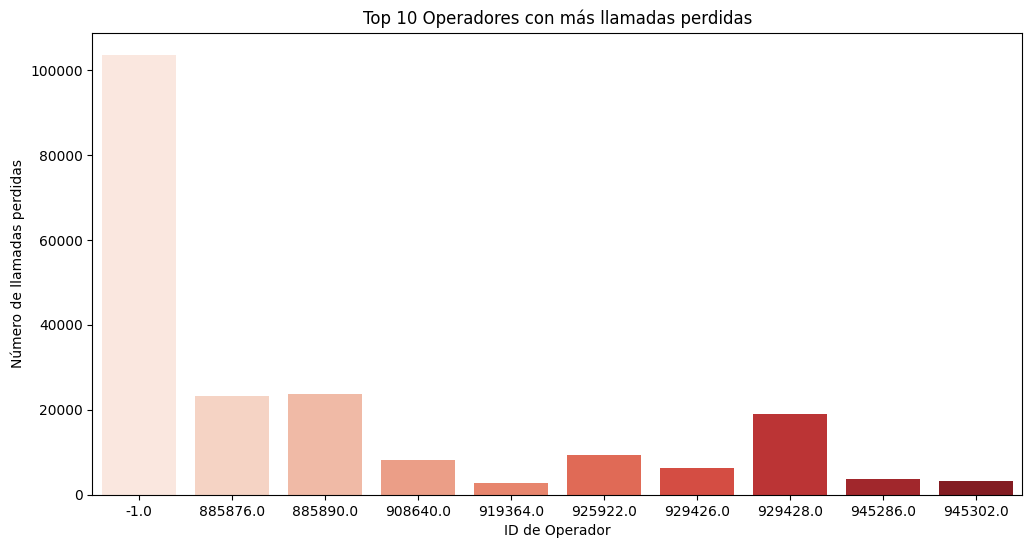

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=missed_calls_summary.head(10), x='operator_id', y='calls_count', palette='Reds')
plt.title("Top 10 Operadores con más llamadas perdidas")
plt.xlabel("ID de Operador")
plt.ylabel("Número de llamadas perdidas")
plt.show()

**Concluciones:**

**Categoría "-1.0" (valores imputados):**

La categoría con valor simbólico "-1.0" presenta, de lejos, la mayor cantidad de llamadas perdidas. Esto es lógico, ya que representa los registros donde el operador no estaba identificado.

Su volumen desproporcionado indica que la falta de datos sobre el operador es significativa y merece atención adicional para determinar cómo tratar esta categoría en el análisis.

**Otros operadores destacados:**

Los operadores con ID 885876.0 y 885890.0 tienen una cantidad considerable de llamadas perdidas, pero en comparación con la categoría "-1.0", sus cifras son mucho menores.

El resto de los operadores tienen valores notablemente más bajos, mostrando una distribución mucho más uniforme entre ellos.

**Posibles implicaciones:**

Es probable que la mayoría de las llamadas sin operador identificado estén asociadas a un tipo de error o una condición específica del sistema. Analizar el contexto de estas entradas podría ser útil para entender su origen.

En cuanto a los operadores identificados, los valores altos en ciertos IDs pueden indicar problemas específicos de red o servicio relacionados con esas entidades.

**Comparar con el volumen total:**

Calcular el volumen total de llamadas por operador, las llamadas perdidas y el porcentaje que representan estas llamadas perdidas sobre el total:

In [25]:
total_calls_summary = telecom_dataset.groupby('operator_id')['calls_count'].sum().reset_index()
total_calls_summary.rename(columns={'calls_count': 'total_calls'}, inplace=True)

missed_calls_summary = telecom_dataset[telecom_dataset['is_missed_call'] == 1].groupby('operator_id')['calls_count'].sum().reset_index()
missed_calls_summary.rename(columns={'calls_count': 'missed_calls'}, inplace=True)

calls_summary = pd.merge(total_calls_summary, missed_calls_summary, on='operator_id', how='left')

calls_summary['missed_calls'].fillna(0, inplace=True)

calls_summary['missed_calls_percentage'] = (calls_summary['missed_calls'] / calls_summary['total_calls']) * 100

calls_summary.sort_values(by='missed_calls_percentage', ascending=False, inplace=True)

print(calls_summary.head(10)) 


      operator_id  total_calls  missed_calls  missed_calls_percentage
875      946454.0           13          13.0                    100.0
254      905480.0            1           1.0                    100.0
93       891976.0            2           2.0                    100.0
618      932246.0            1           1.0                    100.0
716      937872.0            1           1.0                    100.0
1031     960674.0            2           2.0                    100.0
457      919418.0            2           2.0                    100.0
983      955068.0            2           2.0                    100.0
1042     962904.0            2           2.0                    100.0
529      924572.0            1           1.0                    100.0


**Análisis del tiempo de espera promedio**

In [16]:
wait_time_summary = telecom_dataset[telecom_dataset['direction'] == 'in'].groupby('operator_id')['wait_time'].mean().sort_values(ascending=False)
wait_time_summary = wait_time_summary.reset_index()


**Visualizar operadores con mayor tiempo de espera promedio**

C:\Users\lankf\AppData\Local\Temp\ipykernel_10824\852555122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wait_time_summary.head(10), x='operator_id', y='wait_time', palette='Blues')


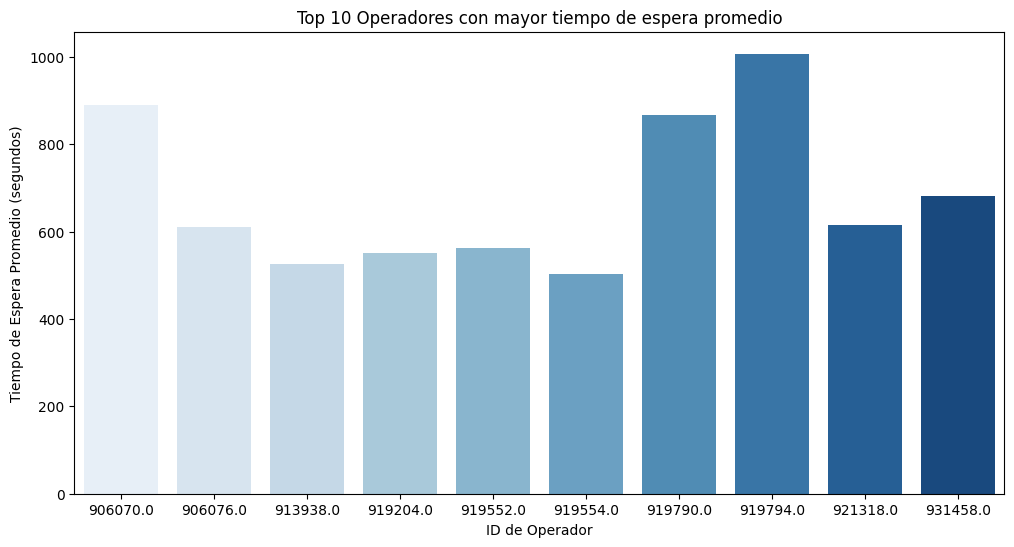

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=wait_time_summary.head(10), x='operator_id', y='wait_time', palette='Blues')
plt.title("Top 10 Operadores con mayor tiempo de espera promedio")
plt.xlabel("ID de Operador")
plt.ylabel("Tiempo de Espera Promedio (segundos)")
plt.show()

**Concluciones:**

**Operadores con tiempos de espera muy altos:**

El operador con ID 906070.0 tiene el mayor tiempo de espera promedio, superando los 900 segundos (15 minutos), lo que podría ser una señal de problemas en la eficiencia o recursos disponibles para atender llamadas.

Otros operadores, como 919794.0 y 919790.0, también tienen tiempos de espera significativamente altos.

**Tiempos promedio más equilibrados:**

Los operadores hacia el final del top 10, como 921318.0 y 931458.0, tienen tiempos de espera más bajos en comparación con los principales.


**Recomendaciones:**

Analizar las causas del alto tiempo de espera para los operadores con mayor promedio, incluyendo posibles sobrecargas de llamadas, insuficiencia de personal o ineficiencias en el sistema.

Considerar redistribuir llamadas o ajustar los recursos entre operadores para equilibrar la carga.

**Análisis de llamadas salientes por operador**

In [18]:
outgoing_calls = telecom_dataset[telecom_dataset['direction'] == 'out']
outgoing_calls_summary = outgoing_calls.groupby('operator_id')['calls_count'].sum().sort_values(ascending=True)
outgoing_calls_summary = outgoing_calls_summary.reset_index()


**Visualizar operadores con menor número de llamadas salientes**

C:\Users\lankf\AppData\Local\Temp\ipykernel_10824\2162711938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outgoing_calls_summary.head(10), x='operator_id', y='calls_count', palette='Greens')


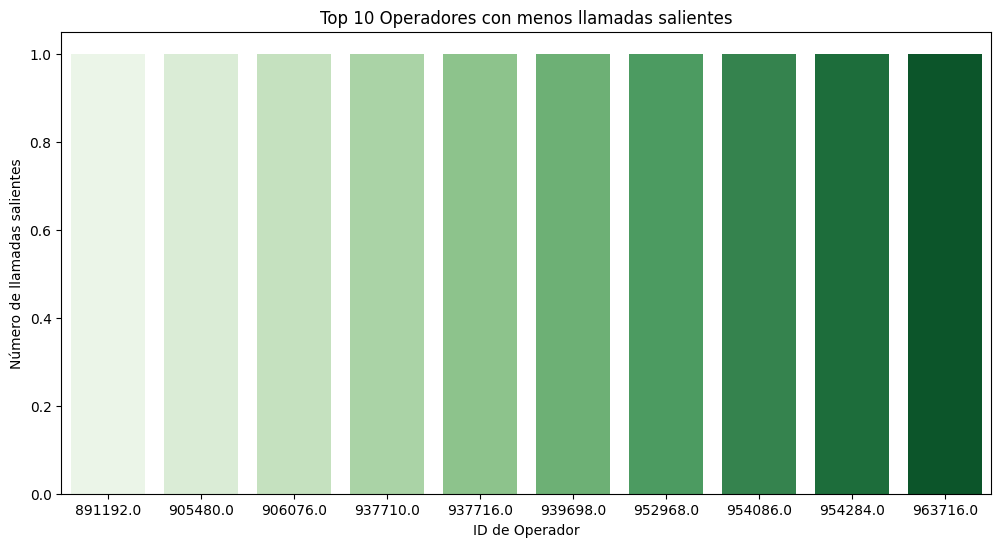

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=outgoing_calls_summary.head(10), x='operator_id', y='calls_count', palette='Greens')
plt.title("Top 10 Operadores con menos llamadas salientes")
plt.xlabel("ID de Operador")
plt.ylabel("Número de llamadas salientes")
plt.show()

**Conclusiones:**

**Baja actividad de llamadas salientes:**

Los operadores listados apenas contribuyen a las llamadas salientes, lo cual puede deberse a varios factores, como:

Su rol puede estar más enfocado en recibir llamadas en lugar de hacerlas.

Problemas o restricciones en su capacidad para realizar llamadas salientes.

**Consistencia en el bajo volumen:**

El hecho de que todos tengan el mismo número mínimo (1 llamada) sugiere que no es un fenómeno aislado, sino una característica compartida entre estos operadores.

**Recomendaciones:**

**Investigar la razón detrás del bajo número de llamadas salientes:**

Determinar si esto se debe a una decisión operativa, restricciones técnicas o falta de interacción con los clientes.

**Revisar el impacto en la operación:**

Evaluar si la baja cantidad de llamadas salientes afecta la eficiencia general del servicio o las métricas de satisfacción del cliente.

**Identificar posibles patrones:**

Revisar otras métricas relacionadas con estos operadores, como el tiempo de espera, llamadas perdidas, etc., para ver si hay una correlación entre estos factores.

**3. Análisis de Factores Relacionados con la Ineficacia**

**Operadores con métricas combinadas de ineficacia**

In [20]:
ineffective_operators = telecom_dataset.groupby('operator_id').agg({
    'calls_count': 'sum',
    'call_duration': 'sum',
    'total_call_duration': 'sum',
    'is_missed_call': 'sum',
    'wait_time': 'mean'
}).reset_index()

**Filtrar operadores ineficaces**

In [21]:
threshold_missed_calls = ineffective_operators['is_missed_call'].quantile(0.75)
threshold_wait_time = ineffective_operators['wait_time'].quantile(0.75)

ineffective_operators = ineffective_operators[
    (ineffective_operators['is_missed_call'] > threshold_missed_calls) &
    (ineffective_operators['wait_time'] > threshold_wait_time)
]

display(ineffective_operators)

,operator_id,calls_count,call_duration,total_call_duration,is_missed_call,wait_time
0,-1.0,104564,497685,1766770,7343,170.209898
2,879898.0,7313,257391,361288,89,457.696035
6,880028.0,2560,146804,189260,82,210.178218
13,882686.0,3650,366417,431100,83,288.763393
15,882690.0,1588,132568,169219,23,581.761905
...,...,...,...,...,...,...
948,952458.0,1556,44084,75312,25,844.000000
952,952468.0,1127,32273,52515,24,547.081081
959,952948.0,4720,471430,493000,46,224.687500
966,953462.0,684,67507,79698,20,406.366667


**1.Identificación de Operadores Ineficaces**
 
Los operadores incluidos en este análisis tienen un número de llamadas perdidas (is_missed_call) y tiempos de espera promedio (wait_time) que están por encima del tercer cuartil (75% superior) de sus respectivas distribuciones.

Por ejemplo:

El operador con ID 952458 tiene un tiempo de espera promedio extremadamente alto (844 segundos) y 25 llamadas perdidas.

El operador con ID 952468 presenta 24 llamadas perdidas y un tiempo de espera promedio de 547 segundos.

**2. Ineficacia por Métricas Combinadas**

Al observar otras métricas relacionadas:

Volumen total de llamadas (calls_count):

Algunos operadores tienen un bajo número total de llamadas, lo que podría indicar que no están manejando un gran volumen, pero aun así presentan métricas ineficaces.

Por ejemplo, 953462 tiene solo 684 llamadas totales, pero aún presenta un alto tiempo de espera (406 segundos).

Duración total y promedio de llamadas (call_duration y total_call_duration):

Operadores con tiempos prolongados de llamada pueden estar enfrentando problemas de gestión del tiempo o interacciones complicadas con los clientes.

Ejemplo:

952948 manejó 4720 llamadas con una duración total de 471,430 segundos, pero sigue teniendo problemas con tiempos de espera (224 segundos en promedio).

**3. Impacto Potencial**

Llamadas Perdidas:

Un alto número de llamadas perdidas (como en 879898, con 89 llamadas perdidas) puede reflejar una baja satisfacción del cliente y pérdida de oportunidades de negocio.

Tiempos de Espera:

Operadores como 952458 (844 segundos de espera) generan experiencias negativas para los clientes, aumentando la probabilidad de insatisfacción.

**4. Tendencias Generales**

Operadores con alta carga: Algunos operadores (por ejemplo, -1.0) manejan un gran volumen de llamadas (104,564), lo que podría ser la razón de su ineficacia en el manejo de tiempos de espera y llamadas perdidas.

Operadores con bajo desempeño: Otros operadores tienen volúmenes bajos, pero aún así presentan ineficiencia, lo que indica problemas individuales de gestión o capacitación.

**Recomendaciones:**

Redistribuir la carga de trabajo:

Reducir el número de llamadas asignadas a los operadores con alta carga, como -1.0, y evaluar si los recursos están distribuidos adecuadamente.

Capacitación y optimización:

Proveer entrenamiento adicional para mejorar la eficiencia en la gestión de llamadas y reducir los tiempos de espera.
Revisar herramientas de soporte:

Verificar si los operadores con altos tiempos de espera tienen acceso a herramientas adecuadas para resolver problemas rápidamente.

Seguimiento continuo:

Implementar un sistema de monitoreo continuo para identificar y abordar problemas de ineficiencia en tiempo real.

**4. Pruebas Estadísticas**

**Hipótesis: Los operadores con muchas llamadas perdidas también tienen tiempos de espera mayores.**

In [22]:
group_high_missed_calls = telecom_dataset[telecom_dataset['is_missed_call'] == 1]['wait_time']
group_low_missed_calls = telecom_dataset[telecom_dataset['is_missed_call'] == 0]['wait_time']


**Prueba t de medias independientes**

In [23]:
t_stat, p_value = ttest_ind(group_high_missed_calls, group_low_missed_calls)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en los tiempos de espera entre las llamadas perdidas y no perdidas.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa en los tiempos de espera entre las llamadas perdidas y no perdidas.")

T-Statistic: 10.6217549116298, P-Value: 2.521845658266195e-26
Rechazamos la hipótesis nula: Existe una diferencia significativa en los tiempos de espera entre las llamadas perdidas y no perdidas.


La prueba t de medias independientes ha demostrado que existe una diferencia significativa en los tiempos de espera entre las llamadas perdidas y las no perdidas.

**Conclusiones Principales:**

**Diferencia Significativa en Tiempos de Espera:**

El valor de la t-statistic (10.62) es bastante alto, lo que sugiere que la diferencia entre los tiempos de espera de las llamadas perdidas y las no perdidas es significativa.

El p-value es extremadamente bajo (aproximadamente 2.52 × 10(elevado)−26), lo que nos lleva a rechazar la hipótesis nula de que no hay diferencia en los tiempos de espera.

**Interpretación del Resultado:**

La diferencia significativa sugiere que los operadores que tienen más llamadas perdidas también tienden a tener tiempos de espera más altos. Esto podría ser un indicio de que estos operadores están lidiando con situaciones de mayor complejidad o tienen una mayor carga de trabajo que podría estar afectando la capacidad para atender las llamadas a tiempo.

Los tiempos de espera más largos pueden estar contribuyendo directamente a la frustración de los usuarios, lo que lleva a un aumento de las llamadas perdidas.

**Posibles Causas:**

Sobrecarga de trabajo: 

Los operadores con tiempos de espera altos podrían estar enfrentando una carga excesiva de llamadas, lo que les impide manejar eficientemente todas las solicitudes, resultando en llamadas perdidas.

Capacitación insuficiente o ineficiencia:

Operadores que no están completamente capacitados o que tienen un rendimiento bajo podrían estar causando tanto un incremento en los tiempos de espera como en las llamadas perdidas.

**Impacto en la Satisfacción del Cliente:**

Los tiempos de espera prolongados y las llamadas perdidas tienen un impacto negativo directo en la experiencia del cliente. Los clientes que experimentan largos tiempos de espera pueden decidir colgar antes de ser atendidos, aumentando la tasa de llamadas perdidas.

Si no se abordan estos problemas, se podría enfrentar una mayor insatisfacción y un mayor número de quejas.



**Recomendaciones**

**Revisión de la carga de trabajo de los operadores:**

Se recomienda revisar si los operadores con más llamadas perdidas y tiempos de espera elevados están recibiendo una carga excesiva. Puede ser útil redistribuir el volumen de llamadas o agregar más operadores para equilibrar la carga.

**Capacitación y soporte adicional:**

Implementar programas de capacitación para mejorar la eficiencia de los operadores en la gestión de llamadas, especialmente en aquellos con tiempos de espera más altos.

**Optimización del proceso de atención al cliente:**

Evaluar el flujo de trabajo de los operadores y las herramientas de soporte disponibles para asegurarse de que puedan manejar las llamadas de manera más rápida y eficiente, reduciendo así los tiempos de espera y las llamadas perdidas.

**Monitoreo constante de indicadores clave:**

Monitorear constantemente las métricas de tiempo de espera y llamadas perdidas para identificar posibles áreas de mejora y tomar medidas preventivas para evitar que la situación empeore.

# Conclusión General del Proyecto:

Este proyecto ha analizado diversas métricas operativas relacionadas con el rendimiento de los operadores en un centro de llamadas, con el objetivo de identificar áreas de mejora en la eficiencia del servicio y la satisfacción del cliente. A través de un análisis detallado de las métricas de llamadas, tiempos de espera, llamadas perdidas y otros factores asociados, se ha logrado obtener una visión clara de los problemas clave que afectan el desempeño de los operadores.

# Análisis de Resultados:

**Operadores con Mayor Tiempo de Espera:**

Se identificaron los operadores con los mayores tiempos de espera promedio, lo que sugiere que algunos operadores podrían estar enfrentando una carga de trabajo excesiva o limitaciones en los recursos disponibles. Este factor puede contribuir a una experiencia de usuario negativa, ya que los clientes que esperan demasiado tiempo pueden abandonar la llamada antes de ser atendidos.

**Operadores con Menor Número de Llamadas Salientes:**

Se observó que ciertos operadores tienen un número significativamente menor de llamadas salientes. Esto podría deberse a diversos factores, como una baja carga de trabajo o una distribución desequilibrada de las llamadas entrantes y salientes. Es importante investigar si estos operadores están siendo subutilizados o si hay problemas que les impiden realizar más llamadas.

**Ineficacia en los Operadores:**

Se identificaron operadores que presentan altos niveles de ineficiencia, definidos por un número elevado de llamadas perdidas y tiempos de espera prolongados. Estos operadores tienen un impacto negativo en la satisfacción del cliente, y se deben tomar medidas correctivas, como mejorar su capacitación, reducir su carga de trabajo o redistribuir tareas para evitar la sobrecarga.

**Prueba Estadística sobre Llamadas Perdidas y Tiempos de Espera:**

A través de la prueba t de medias independientes, se demostró que existe una diferencia significativa entre los tiempos de espera de las llamadas perdidas y las no perdidas. Los operadores con mayores tiempos de espera también experimentan un número mayor de llamadas perdidas, lo que indica que la ineficiencia en la gestión de las llamadas está relacionada con un servicio lento y una mayor tasa de frustración de los usuarios.

# Recomendaciones Generales:

**Optimización de la Gestión de Llamadas:**

Es crucial redistribuir las llamadas de manera más equitativa entre los operadores, asegurando que aquellos con mayores tiempos de espera no estén sobrecargados de trabajo. Esto podría incluir la contratación de más operadores o la mejora en la distribución de las llamadas.

**Mejora de la Capacitación:**

La capacitación de los operadores debe ser prioritaria, especialmente para aquellos con altos tiempos de espera o un alto volumen de llamadas perdidas. Mejorar la eficiencia de los operadores puede reducir significativamente el número de llamadas perdidas y los tiempos de espera, mejorando así la experiencia del cliente.

**Monitoreo Continuo de las Métricas:**

Es importante implementar un sistema de monitoreo constante de las métricas de llamadas, como el tiempo de espera, las llamadas perdidas y el número de llamadas atendidas. Esto permitirá identificar rápidamente cualquier patrón problemático y tomar medidas preventivas.

**Implementación de Herramientas de Soporte:**

Utilizar herramientas tecnológicas que faciliten la gestión de llamadas y el monitoreo en tiempo real de los indicadores operativos. Esto permitirá a los operadores manejar las llamadas de manera más eficiente y mejorar el tiempo de respuesta.

# Conclusión Final:

En resumen, el análisis realizado proporciona una visión integral del desempeño de los operadores en el centro de llamadas, identificando los factores clave que contribuyen a la ineficiencia y proponiendo medidas concretas para mejorar la calidad del servicio. A través de la optimización de la gestión de llamadas, la capacitación de los operadores y el monitoreo constante, es posible reducir tanto los tiempos de espera como las llamadas perdidas, lo que a su vez llevará a una mayor satisfacción del cliente y un rendimiento más eficiente del centro de llamadas.